In [1]:
import datetime
from scipy import stats

import geopandas as gpd
import pandas as pd
import numpy as np
import yaml
import statsmodels.api as sm
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
PATH_PROJECT = "/home/yoshraf/projects/mestrado/"

pd.options.display.max_columns = None

df07 = pd.read_parquet(f"{PATH_PROJECT}data/processed/dataset07.parquet")
df17 = pd.read_parquet(f"{PATH_PROJECT}data/processed/dataset17.parquet")

In [3]:
df07[["loc_domicilio_dist_metro", "loc_domicilio_dist_metro17"]]

,loc_domicilio_dist_metro,loc_domicilio_dist_metro17
21838,3643.788023,1229.022019
21839,3643.788023,1229.022019
21840,3643.788023,1229.022019
21841,3643.788023,1229.022019
21842,3643.788023,1229.022019
...,...,...
151294,6492.138675,1241.825428
151295,6492.138675,1241.825428
151296,6492.138675,1241.825428
151297,6492.138675,1241.825428


In [4]:
def subway_rate(df, od07=False):
    if od07:
        df = df[df["loc_domicilio_dist_metro"] >= 1000]
        df["loc_domicilio_dist_metro"] = df["loc_domicilio_dist_metro17"].values
    df = df[COLS]
    # Dropnan (viagens não realizadas)
    df = df.dropna()
    # Retira pessoas que ja moravam perto do metrô
    # Map de metro para
    df[LABEL] = df[LABEL].apply(lambda x: 1 if x == "Metrô" else 0)

    # Group by person
    df_mean = pd.DataFrame(df.groupby(IDX)[LABEL].mean())
    df_mean.columns = ["Taxa de Metrô"]
    df2 = df.merge(df_mean, on=IDX)
    df2 = df2.drop(columns=[LABEL]).drop_duplicates()
    return df2

In [5]:
IDX = [
    "Identifica Pessoa"
]

COLS = [
    "Identifica Pessoa",
    "Idade",
    "Gênero",
    "per Quantidade Automóvel",
    "per Renda Familiar Mensal",
    "loc_domicilio_dist_metro",
    "Modo Principal",
]

LABEL = "Modo Principal"

cols_rename = {
    "Identifica pessoa": "Identifica Pessoa",
    "per Renda familiar mensal": "per Renda Familiar Mensal",
    "per Quantidade de automóveis": "per Quantidade Automóvel"
}
df17.rename(columns = cols_rename, inplace=True)

In [6]:
df07_choice2 = subway_rate(df07, od07 = True)
df17_choice2 = subway_rate(df17)

<ipython-input-4-d8732fe8944a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["loc_domicilio_dist_metro"] = df["loc_domicilio_dist_metro17"].values


In [7]:
df07_choice2["OD17"] = 0
df17_choice2["OD17"] = 1

In [8]:
dataset = pd.concat([df07_choice2, df17_choice2])

In [9]:
dataset["T_200"] = dataset["loc_domicilio_dist_metro"].apply(lambda x: 1 if x < 200 else 0)
dataset["T_400"] = dataset["loc_domicilio_dist_metro"].apply(lambda x: 1 if x < 400 else 0)
dataset["T_500"] = dataset["loc_domicilio_dist_metro"].apply(lambda x: 1 if x < 500 else 0)
dataset["T_600"] = dataset["loc_domicilio_dist_metro"].apply(lambda x: 1 if x < 600 else 0)
dataset["T_800"] = dataset["loc_domicilio_dist_metro"].apply(lambda x: 1 if x < 800 else 0)
dataset["T_1000"] = dataset["loc_domicilio_dist_metro"].apply(lambda x: 1 if x < 1000 else 0)
dataset["T_1500"] = dataset["loc_domicilio_dist_metro"].apply(lambda x: 1 if x < 1500 else 0)
dataset["T_2000"] = dataset["loc_domicilio_dist_metro"].apply(lambda x: 1 if x < 2000 else 0)
dataset["T_2500"] = dataset["loc_domicilio_dist_metro"].apply(lambda x: 1 if x < 2500 else 0)
dataset["T_3000"] = dataset["loc_domicilio_dist_metro"].apply(lambda x: 1 if x < 3000 else 0)

In [10]:
dataset = dataset.set_index(IDX)
dataset = pd.get_dummies(dataset, drop_first=True)

In [11]:
dataset

,Idade,per Quantidade Automóvel,per Renda Familiar Mensal,loc_domicilio_dist_metro,Taxa de Metrô,OD17,T_200,T_400,T_500,T_600,T_800,T_1000,T_1500,T_2000,T_2500,T_3000,Gênero_Masculino
Identifica Pessoa,,,,,,,,,,,,,,,,,
04600010101,52.0,0.250000,295.000000,1229.022019,0.0,0,0,0,0,0,0,0,1,1,1,1,1
04600010102,41.0,0.250000,295.000000,1229.022019,0.0,0,0,0,0,0,0,0,1,1,1,1,0
04600010103,9.0,0.250000,295.000000,1229.022019,0.0,0,0,0,0,0,0,0,1,1,1,1,0
04600020101,45.0,1.000000,2000.000000,1173.817829,0.0,0,0,0,0,0,0,0,1,1,1,1,1
04600040101,46.0,0.000000,650.000000,1243.563702,0.0,0,0,0,0,0,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
03421904101,54.0,0.666667,3153.876819,2392.070929,0.0,1,0,0,0,0,0,0,0,0,1,1,1
03421904103,27.0,0.666667,3153.876819,2392.070929,1.0,1,0,0,0,0,0,0,0,0,1,1,0
03422006101,52.0,0.500000,4730.815229,3099.144379,0.0,1,0,0,0,0,0,0,0,0,0,0,0


In [12]:
COLS_MODELING = ["Idade", "per Quantidade Automóvel", "per Renda Familiar Mensal", "OD17", "Gênero_Masculino"]

def diff_diff(df, T, features, report=False):
    features = features + [T]
    df_model = df[features].copy()
    df_model["OD17:T"] = df_model["OD17"].values * df_model[T].values
    df_model = sm.add_constant(df_model)
    res = sm.OLS(dataset["Taxa de Metrô"].values, df_model).fit()
    if report:
        print(res.summary())
    df_ci = res.conf_int()[res.conf_int().index=='OD17:T']
    df_ci.columns = ["LB", "UB"]
    df_ci["coef"] = df_ci.mean(axis=1)
    return df_ci
    

In [13]:
diff_diff(dataset, "T_600", COLS_MODELING, True)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     53.36
Date:                Sat, 24 Jul 2021   Prob (F-statistic):           9.84e-75
Time:                        21:35:27   Log-Likelihood:                -6.4457
No. Observations:                7373   AIC:                             28.89
Df Residuals:                    7365   BIC:                             84.14
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,LB,UB,coef
OD17:T,0.084334,0.142884,0.113609


In [14]:
list_t = ["T_200", "T_600", "T_1000", "T_1500", "T_2000", "T_2500", "T_3000"]

df_res = pd.concat([diff_diff(dataset, t, COLS_MODELING).assign(T=t) for t in list_t])

In [15]:
dataset_dummy = dataset.copy()

In [16]:
dataset_dummy["T_600_suffle"] = np.random.permutation(dataset_dummy["T_600"])

In [17]:
diff_diff(dataset_dummy, "T_600_suffle", COLS_MODELING, True)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     35.52
Date:                Sat, 24 Jul 2021   Prob (F-statistic):           3.81e-49
Time:                        21:35:30   Log-Likelihood:                -66.400
No. Observations:                7373   AIC:                             148.8
Df Residuals:                    7365   BIC:                             204.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,LB,UB,coef
OD17:T,-0.039562,0.019445,-0.010058


In [18]:
dataset_dummy

,Idade,per Quantidade Automóvel,per Renda Familiar Mensal,loc_domicilio_dist_metro,Taxa de Metrô,OD17,T_200,T_400,T_500,T_600,T_800,T_1000,T_1500,T_2000,T_2500,T_3000,Gênero_Masculino,T_600_suffle
Identifica Pessoa,,,,,,,,,,,,,,,,,,
04600010101,52.0,0.250000,295.000000,1229.022019,0.0,0,0,0,0,0,0,0,1,1,1,1,1,1
04600010102,41.0,0.250000,295.000000,1229.022019,0.0,0,0,0,0,0,0,0,1,1,1,1,0,0
04600010103,9.0,0.250000,295.000000,1229.022019,0.0,0,0,0,0,0,0,0,1,1,1,1,0,1
04600020101,45.0,1.000000,2000.000000,1173.817829,0.0,0,0,0,0,0,0,0,1,1,1,1,1,0
04600040101,46.0,0.000000,650.000000,1243.563702,0.0,0,0,0,0,0,0,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
03421904101,54.0,0.666667,3153.876819,2392.070929,0.0,1,0,0,0,0,0,0,0,0,1,1,1,0
03421904103,27.0,0.666667,3153.876819,2392.070929,1.0,1,0,0,0,0,0,0,0,0,1,1,0,1
03422006101,52.0,0.500000,4730.815229,3099.144379,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
df_res

,LB,UB,coef,T
OD17:T,0.055645,0.230257,0.142951,T_200
OD17:T,0.084334,0.142884,0.113609,T_600
OD17:T,0.063837,0.110280,0.087058,T_1000
OD17:T,0.040656,0.085486,0.063071,T_1500
OD17:T,0.024287,0.072471,0.048379,T_2000
OD17:T,0.010976,0.070629,0.040803,T_2500
OD17:T,-0.018377,0.083931,0.032777,T_3000


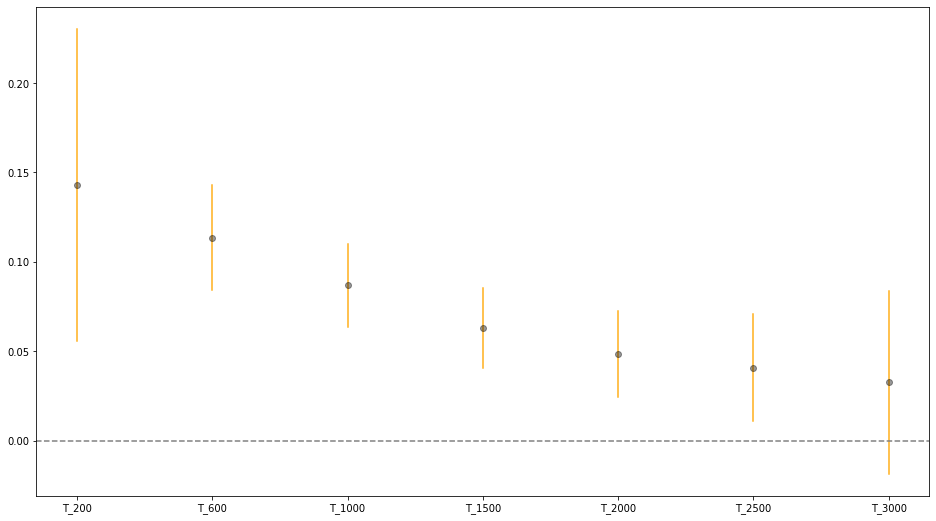

In [20]:
fig, ax = plt.subplots(figsize=(16, 9))
for lower, upper, c, y in zip(df_res['LB'], df_res['UB'], df_res['coef'], range(len(df_res))):
    plt.plot((y,y), (lower, upper), '-', color="orange", alpha=.9)
    plt.plot(y, c, 'o', color='black', alpha=.4)
# plt.xticks(list(df_res['T']), range(len(df_res)))
plt.xticks(range(len(df_res)), list(df_res['T']))
plt.axhline(0, color="grey", linestyle="--")
plt.show()

In [21]:
df_res

,LB,UB,coef,T
OD17:T,0.055645,0.230257,0.142951,T_200
OD17:T,0.084334,0.142884,0.113609,T_600
OD17:T,0.063837,0.110280,0.087058,T_1000
OD17:T,0.040656,0.085486,0.063071,T_1500
OD17:T,0.024287,0.072471,0.048379,T_2000
OD17:T,0.010976,0.070629,0.040803,T_2500
OD17:T,-0.018377,0.083931,0.032777,T_3000


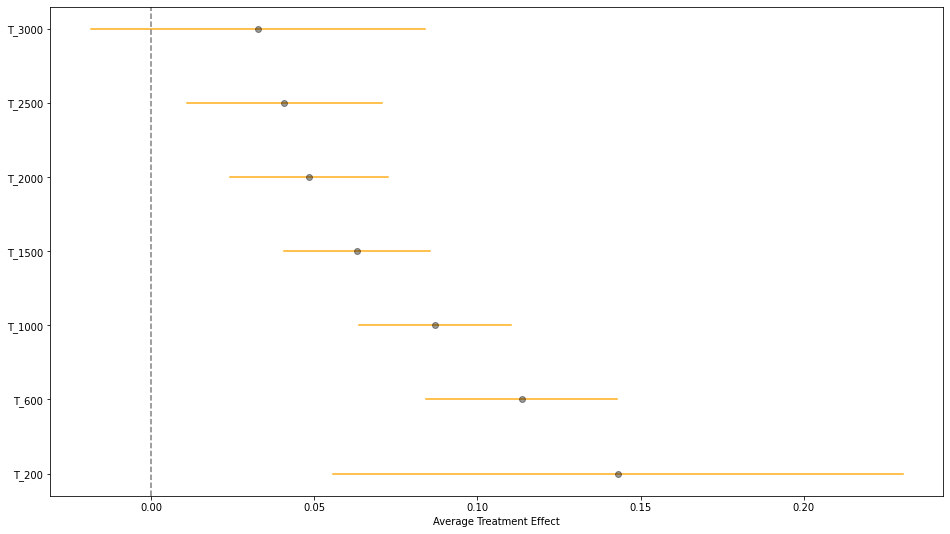

In [22]:
fig, ax = plt.subplots(figsize=(16, 9))
for lower, upper, c, y in zip(df_res['LB'], df_res['UB'], df_res['coef'], range(len(df_res))):
    plt.plot((lower, upper), (y,y), '-', color="orange", alpha=.9)
    plt.plot(c, y, 'o', color='black', alpha=.4)
plt.yticks(range(len(df_res)), list(df_res['T']))
plt.axvline(0, color="grey", linestyle="--")
plt.xlabel("Average Treatment Effect")
plt.show()

In [23]:
def diff_diff_ba(df, T):
    df_plot = pd.DataFrame(df.groupby(["OD17", T])["Taxa de Metrô"].mean()).reset_index()
    df_plot.columns = ["OD2017", "T", "Taxa Metrô"]
    df_plot["Treatment"] = T
    return df_plot

def diff_diff_ba_treat(df, T):
    df_plot = pd.DataFrame(df.groupby(["OD17", T])["Taxa de Metrô"].mean()).reset_index()
    df_plot.columns = ["OD2017", "T", "Taxa Metrô"]
    df_plot["Treatment"] = T
    df_plot = df_plot[(df_plot["T"] != 0)]
    return df_plot

In [24]:
df_plot_T = pd.concat([diff_diff_ba_treat(dataset, t) for t in ["T_1500", "T_1000"]])

In [25]:
df_plot600 = diff_diff_ba(dataset, "T_600")

In [26]:
df_plot600

,OD2017,T,Taxa Metrô,Treatment
0,0,0,0.040651,T_600
1,0,1,0.035395,T_600
2,1,0,0.095414,T_600
3,1,1,0.209350,T_600


In [27]:
df_plot600 = pd.DataFrame(dataset.groupby(["OD17", "T_600"])["Taxa de Metrô"].mean()).reset_index()
df_plot1000 = pd.DataFrame(dataset.groupby(["OD17", "T_1000"])["Taxa de Metrô"].mean()).reset_index()
df_plot1500 = pd.DataFrame(dataset.groupby(["OD17", "T_1500"])["Taxa de Metrô"].mean()).reset_index()
df_plot3000 = pd.DataFrame(dataset.groupby(["OD17", "T_3000"])["Taxa de Metrô"].mean()).reset_index()

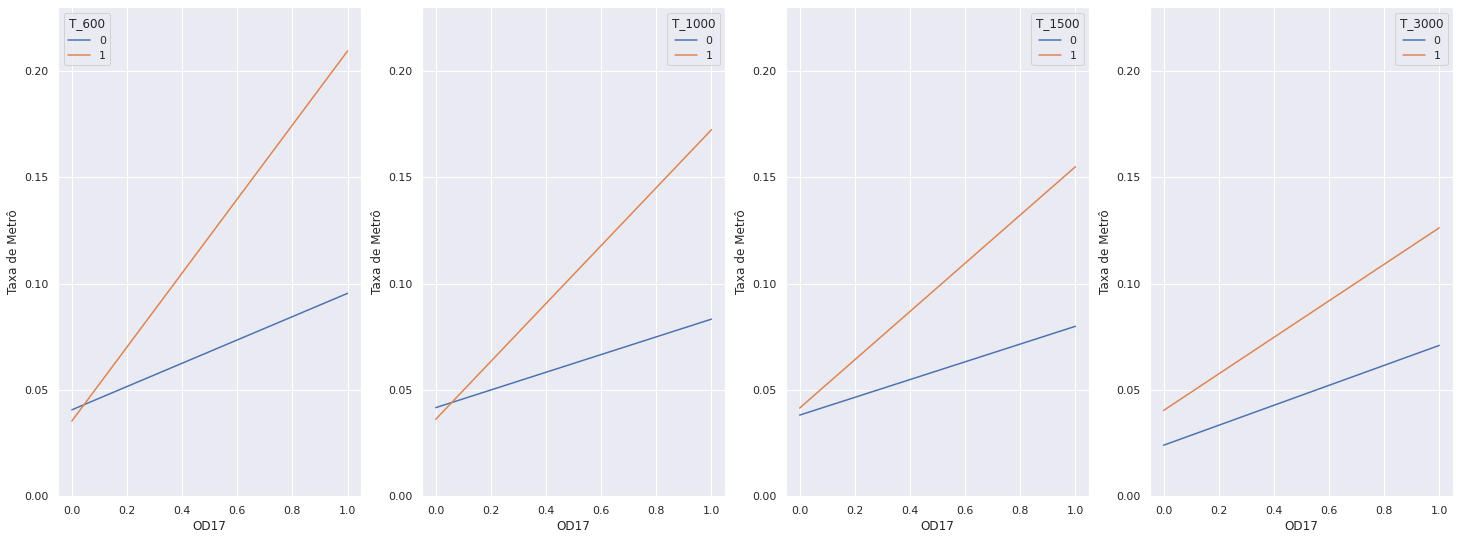

In [28]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(1,4,figsize=(25, 9))
sns.lineplot(data=df_plot600, x="OD17", y="Taxa de Metrô", hue="T_600", ax=ax[0])
sns.lineplot(data=df_plot1000, x="OD17", y="Taxa de Metrô", hue="T_1000", ax=ax[1])
sns.lineplot(data=df_plot1500, x="OD17", y="Taxa de Metrô", hue="T_1500", ax=ax[2])
sns.lineplot(data=df_plot3000, x="OD17", y="Taxa de Metrô", hue="T_3000", ax=ax[3])
ax[0].set_ylim([.0, .23])
ax[1].set_ylim([.0, .23])
ax[2].set_ylim([.0, .23])
ax[3].set_ylim([.0, .23])
plt.show()

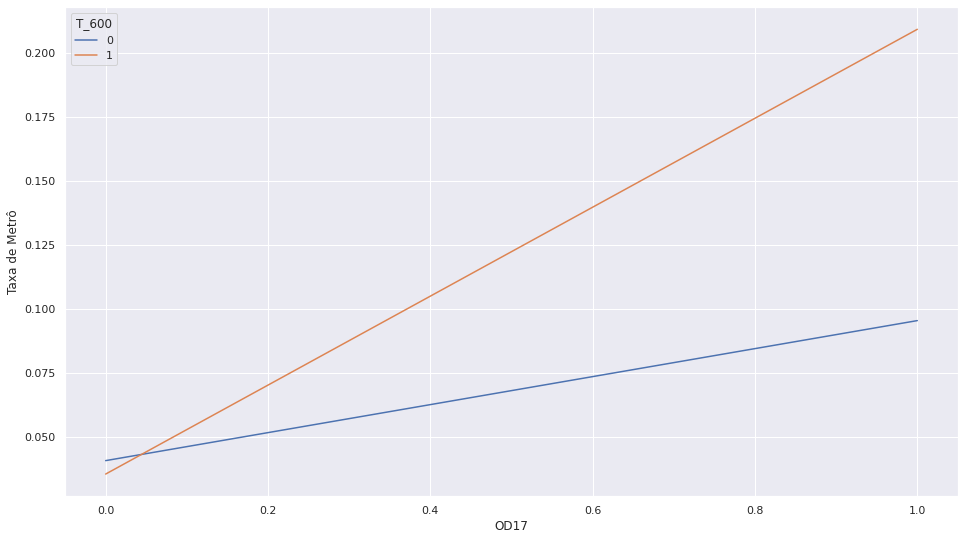

In [29]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(1,figsize=(16, 9))
sns.lineplot(data=df_plot600, x="OD17", y="Taxa de Metrô", hue="T_600", ax=ax)
plt.show()

In [30]:
df_less = pd.DataFrame({"OD17": [-1, -1], "T_600": [0, 1], "Taxa de Metrô": [0.040651, 0]})

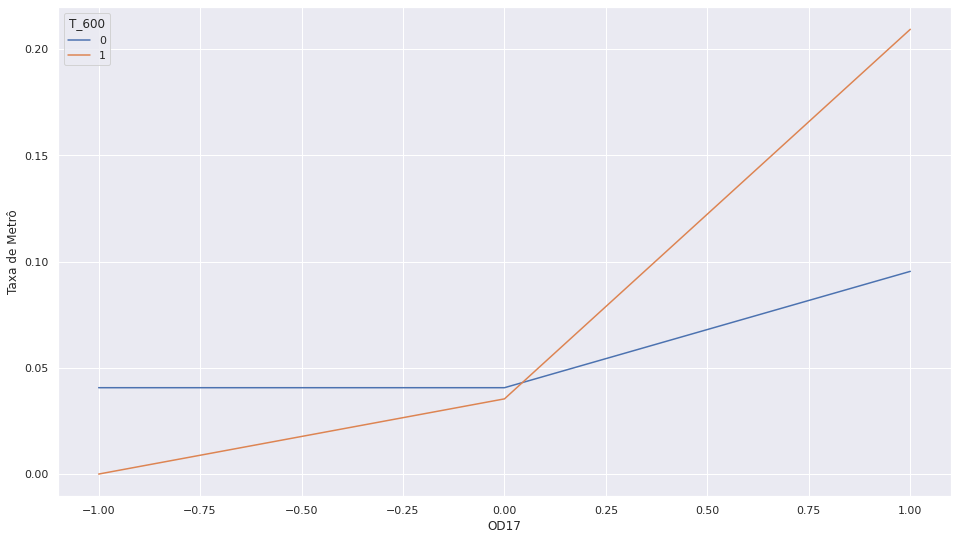

In [32]:
df_600_test = pd.concat([df_less, df_plot600])
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(1,figsize=(16, 9))
sns.lineplot(data=df_600_test, x="OD17", y="Taxa de Metrô", hue="T_600", ax=ax)
plt.show()

# Cofounders

In [33]:
T = "T_600"
features = COLS_MODELING + [T]

In [34]:
dataset2 = dataset[dataset["loc_domicilio_dist_metro"] < 1000]

In [35]:
df_control = dataset[(dataset[T] == 0) & (dataset["OD17"]==0)][features]
df_treatment = dataset[(dataset[T] == 1) & (dataset["OD17"]==0)][features]

In [36]:
df_control17 = dataset[(dataset[T] == 0) & (dataset["OD17"]==1)][features]
df_treatment17 = dataset[(dataset[T] == 1) & (dataset["OD17"]==1)][features]

In [37]:
dataset[features].describe()

,Idade,per Quantidade Automóvel,per Renda Familiar Mensal,OD17,Gênero_Masculino,T_600
count,7373.000000,7373.000000,7373.000000,7373.000000,7373.000000,7373.000000
mean,38.436186,0.366819,2027.942434,0.460735,0.485284,0.175641
std,20.654902,0.340663,2159.450187,0.498490,0.499817,0.380540
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,660.000000,0.000000,0.000000,0.000000
50%,37.000000,0.333333,1333.333333,0.000000,0.000000,0.000000
75%,54.000000,0.500000,2566.666667,1.000000,1.000000,0.000000
max,95.000000,6.000000,38522.586092,1.000000,1.000000,1.000000


In [38]:
df_control.describe()

,Idade,per Quantidade Automóvel,per Renda Familiar Mensal,OD17,Gênero_Masculino,T_600
count,3394.000000,3394.000000,3394.000000,3394.0,3394.000000,3394.0
mean,37.326458,0.351258,1410.226267,0.0,0.475250,0.0
std,20.561713,0.336739,1442.885308,0.0,0.499461,0.0
min,1.000000,0.000000,0.000000,0.0,0.000000,0.0
25%,21.000000,0.000000,475.000000,0.0,0.000000,0.0
50%,36.000000,0.333333,933.000000,0.0,0.000000,0.0
75%,52.000000,0.500000,1934.981064,0.0,1.000000,0.0
max,94.000000,3.000000,14000.000000,0.0,1.000000,0.0


In [39]:
df_treatment.describe()

,Idade,per Quantidade Automóvel,per Renda Familiar Mensal,OD17,Gênero_Masculino,T_600
count,582.000000,582.000000,582.000000,582.0,582.000000,582.0
mean,38.539519,0.443557,1931.498738,0.0,0.458763,1.0
std,19.687603,0.344726,2287.183840,0.0,0.498725,0.0
min,1.000000,0.000000,0.000000,0.0,0.000000,1.0
25%,24.000000,0.200000,753.847922,0.0,0.000000,1.0
50%,35.000000,0.500000,1380.095646,0.0,0.000000,1.0
75%,53.750000,0.666667,2302.734985,0.0,1.000000,1.0
max,93.000000,2.000000,30000.000000,0.0,1.000000,1.0


In [40]:
df_control17.describe()

,Idade,per Quantidade Automóvel,per Renda Familiar Mensal,OD17,Gênero_Masculino,T_600
count,2684.000000,2684.000000,2684.000000,2684.0,2684.000000,2684.0
mean,39.301043,0.369122,2612.202981,1.0,0.505216,0.0
std,21.189583,0.338109,2550.412030,0.0,0.500066,0.0
min,1.000000,0.000000,0.000000,1.0,0.000000,0.0
25%,22.000000,0.000000,937.823803,1.0,0.000000,0.0
50%,39.000000,0.333333,1800.000000,1.0,1.000000,0.0
75%,55.000000,0.500000,3421.563261,1.0,1.000000,0.0
max,95.000000,6.000000,38522.586092,1.0,1.000000,0.0


In [41]:
df_treatment17.describe()

,Idade,per Quantidade Automóvel,per Renda Familiar Mensal,OD17,Gênero_Masculino,T_600
count,713.000000,713.000000,713.000000,713.0,713.000000,713.0
mean,40.378682,0.369589,2847.723072,1.0,0.479663,1.0
std,19.539277,0.357039,2407.362237,0.0,0.499937,0.0
min,1.000000,0.000000,0.000000,1.0,0.000000,1.0
25%,26.000000,0.000000,1193.192434,1.0,0.000000,1.0
50%,37.000000,0.333333,2100.000000,1.0,0.000000,1.0
75%,56.000000,0.500000,3550.000000,1.0,1.000000,1.0
max,89.000000,2.000000,15000.000000,1.0,1.000000,1.0


In [42]:
def diff_in_means(df_c, df_t, var):
    return stats.ttest_ind(df_t[var], df_c[var]).pvalue

In [52]:
print(diff_in_means(df_control, df_control, "Gênero_Masculino"))
print(diff_in_means(df_control, df_treatment, "per Renda Familiar Mensal"))
print(diff_in_means(df_control, df_treatment, "per Quantidade Automóvel"))
print(diff_in_means(df_control, df_treatment, "Idade"))

1.0
3.8067774098813437e-13
1.2511417897267293e-09
0.1858957154164022


In [124]:
print(diff_in_means(df_control17, df_treatment17, "Gênero_Masculino"))
print(diff_in_means(df_control17, df_treatment17, "per Renda Familiar Mensal"))
print(diff_in_means(df_control17, df_treatment17, "per Quantidade Automóvel"))
print(diff_in_means(df_control17, df_treatment17, "Idade"))

0.22525642324136136
0.02666706024763134
0.9741760845459422
0.22009773295741564
